In [ ]:
                                                                        `                                           #importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.model_selection import train_test_split
import gensim
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import nltk
from keras.utils import np_utils
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading all excel files data - 2015,2019,2022(Test and Train)
df_2015 = pd.read_excel('drive/MyDrive/AI ML lab project data/2015_clean_data.xlsx')
df_2019 = pd.read_excel('drive/MyDrive/AI ML lab project data/2019_clean_data.xlsx')
df_2022 = pd.read_excel('drive/MyDrive/AI ML lab project data/2022_clean_data_train.xlsx')

In [ ]:
df_main = pd.concat([df_2015,df_2019,df_2022])

In [ ]:
df_main = df_main.dropna()

In [ ]:
df_main.sample(10)

,clean_text,Party,Textblob_Sentiments,Emotions
1673,"for this election, the period for advance poll...",unrelated tweets,0.000000,Neutral
2047,ledevoir.com/politique/montreal//eaux-usees-le...,ndp,0.000000,Neutral
2126,You care about limiting #ClimateChange and are...,other_election_topics,0.083333,Positive
1418,take harper quiz bit.ly/rpnem win new pm! elxn...,liberals,0.485227,Positive
2619,bat eyelash. smh,unrelated tweets,0.000000,Neutral
1849,<<science>> denonce harper ledevoir.com/societ...,conservatives,0.000000,Neutral
2955,orange goggles girl event courtenay. cdnpoli b...,unrelated tweets,0.000000,Neutral
783,john talks one law cdns,unrelated tweets,0.000000,Neutral
262,"i didn’t vote pc, but i am super happy that th...",liberals,-0.091667,Negative
971,and your point? masks may work against a cold ...,liberals,-0.141667,Negative


In [ ]:
X_train = df_main['clean_text']
y_train = df_main['Emotions']

In [ ]:
tokenize_train = X_train.apply(gensim.utils.simple_preprocess)

In [ ]:
df_test = pd.read_excel('drive/MyDrive/AI ML lab project data/2022_clean_data_test.xlsx')

In [ ]:
df_test = df_test.dropna()

In [ ]:
X_test = df_test['clean_text']
y_test = df_test['Emotions']

In [ ]:
tokenize_test = X_test.apply(gensim.utils.simple_preprocess)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers.normalization import batch_normalization
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
num_classes = 3
y_tr = le.fit_transform(y_train)
y_train = keras.utils.np_utils.to_categorical(y_tr,num_classes)

In [ ]:
y_te = le.transform(y_test)
y_test = keras.utils.np_utils.to_categorical(y_te,num_classes)

In [ ]:
print('Sentiment Class Label Map:', dict(zip(le.classes_,le.transform(le.classes_))))

Sentiment Class Label Map: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [ ]:
print('Encode Labels:',y_te[:10])

Encode Labels: [2 2 2 0 0 0 2 0 0 2]


In [ ]:
print('Onehot Labels:',y_test[:10])

Onehot Labels: [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
#Building Word2Vec Model
w2v_num_features = 512
w2v_model = gensim.models.Word2Vec(tokenize_train,size=w2v_num_features, window=150,min_count=2,sample=0.001)

In [ ]:
def document_vectorizer(corpus,model,num_features):
  vocabulary=set(model.wv.index2word)

  def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords=0
    for word in words:
      if word in vocabulary:
        nwords=nwords+1
        feature_vector=np.add(feature_vector, model.wv[word])
    if nwords:
      feature_vector = np.divide(feature_vector,nwords)

    return feature_vector
  features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]

  return  np.array(features)

In [ ]:
avg_wv_train_features = document_vectorizer(corpus=tokenize_train,model=w2v_model, num_features=w2v_num_features)

In [ ]:
avg_wv_test_features = document_vectorizer(corpus=tokenize_test,model=w2v_model, num_features=w2v_num_features)

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.engine import input_layer
def construct_deepnn(num_input_features):
  dnn_model = Sequential()
  dnn_model.add(Dense(512, input_shape=(num_input_features,), kernel_initializer='glorot_uniform'))
  dnn_model.add(BatchNormalization())
  dnn_model.add(Activation('relu'))
  dnn_model.add(Dropout(0.2))

  dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
  dnn_model.add(BatchNormalization())
  dnn_model.add(Activation('relu'))
  dnn_model.add(Dropout(0.2))

  dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
  dnn_model.add(BatchNormalization())
  dnn_model.add(Activation('relu'))
  dnn_model.add(Dropout(0.2))

  dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
  dnn_model.add(BatchNormalization())
  dnn_model.add(Activation('relu'))
  dnn_model.add(Dropout(0.2))

  dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
  dnn_model.add(BatchNormalization())
  dnn_model.add(Activation('relu'))
  dnn_model.add(Dropout(0.2))

  dnn_model.add(Dense(3))
  dnn_model.add(Activation('softmax'))

  dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return dnn_model

In [ ]:
w2v_dnn = construct_deepnn(num_input_features=w2v_num_features)

In [ ]:
from IPython.display import SVG

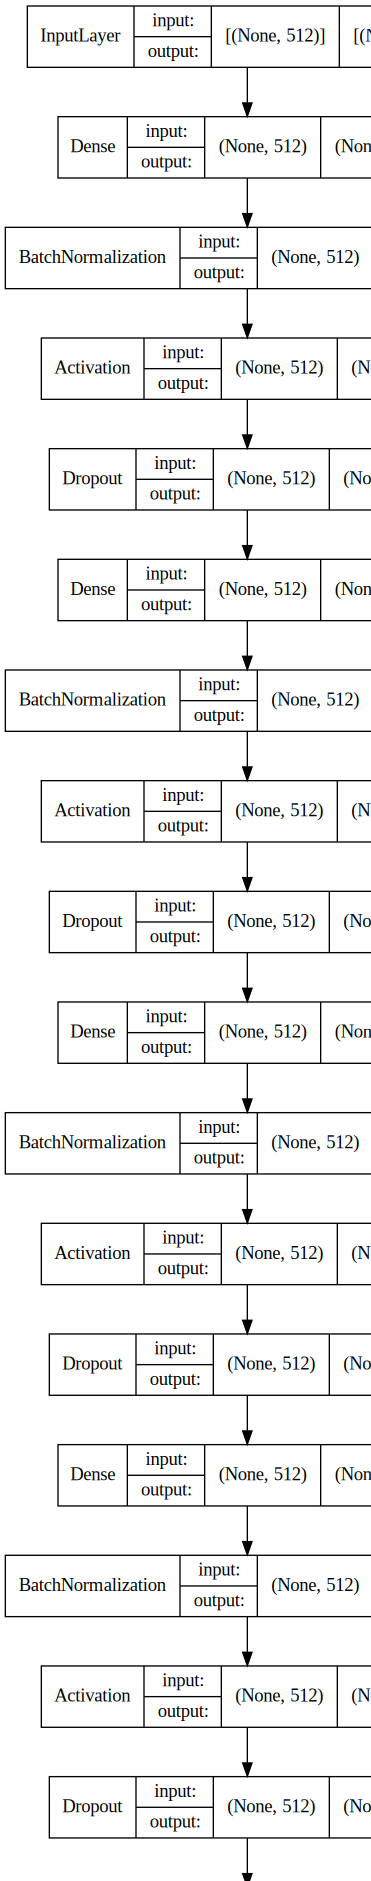

In [ ]:
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
batch_size=100

w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
91/91 [==============================] - 5s 52ms/step - loss: 0.9383 - accuracy: 0.5634 - val_loss: 1.0933 - val_accuracy: 0.4153
Epoch 2/5
91/91 [==============================] - 3s 37ms/step - loss: 0.9388 - accuracy: 0.5600 - val_loss: 1.1437 - val_accuracy: 0.4143
Epoch 3/5
91/91 [==============================] - 3s 32ms/step - loss: 0.9343 - accuracy: 0.5664 - val_loss: 1.0849 - val_accuracy: 0.4698
Epoch 4/5
91/91 [==============================] - 3s 34ms/step - loss: 0.9354 - accuracy: 0.5620 - val_loss: 1.0652 - val_accuracy: 0.5074
Epoch 5/5
91/91 [==============================] - 3s 33ms/step - loss: 0.9319 - accuracy: 0.5650 - val_loss: 0.9812 - val_accuracy: 0.5818


# LSTM

In [ ]:
from collections import Counter

token_counter = Counter([token for review in tokenize_train for token in review])

vocab_map = {item[0]: index+1 for index,item in enumerate(dict(token_counter).items())}

In [ ]:
max_index = np.max(list(vocab_map.values()))
vocab_map['PAD_INDEX'] = 0
vocab_map['NOT_FOUND_INDEX'] = max_index+1
vocab_size = len(vocab_map)

In [ ]:
print('Vocabulary Size:', vocab_size)
print('Sample Size of Vocabulary Size:', dict(list(vocab_map.items())[10:20]))

Vocabulary Size: 16252
Sample Size of Vocabulary Size: {'com': 11, 'upqepkxw': 12, 'justin': 13, 'trudeau': 14, 'reasons': 15, 'thanksgiving': 16, 'today': 17, 'montreal': 18, 'blog': 19, 'bit': 20}


In [ ]:
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

num_classes = 3
max_len = np.max([len(review) for review in tokenize_train])

In [ ]:
# Convert tokeized train to numeric vectors
train_X = [[vocab_map[token] for token in line] for line in tokenize_train]

In [ ]:
train_X = sequence.pad_sequences(train_X,maxlen=max_len)

In [ ]:
# Convert tokeized test to numeric vectors

test_X = [[vocab_map[token] if vocab_map.get(token) else vocab_map['NOT_FOUND_INDEX']for token in line] for line in tokenize_test]

In [ ]:
test_X = sequence.pad_sequences(test_X,maxlen=max_len)

In [ ]:
# Drop out 40%

from keras.layers import Dropout, Embedding, Dense, SpatialDropout1D
from keras.layers import LSTM

EMBEDDING_DIMENSION = 128
LSTM_DIM = 64

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIMENSION, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2,recurrent_dropout=0.4))
model.add(Dense(3,activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_X,y_train,epochs=5, batch_size=100, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
91/91 [==============================] - 57s 582ms/step - loss: 0.8982 - accuracy: 0.5778 - val_loss: 0.8905 - val_accuracy: 0.5828
Epoch 2/5
91/91 [==============================] - 51s 561ms/step - loss: 0.5503 - accuracy: 0.7750 - val_loss: 0.5734 - val_accuracy: 0.7681
Epoch 3/5
91/91 [==============================] - 50s 549ms/step - loss: 0.2288 - accuracy: 0.9230 - val_loss: 0.5059 - val_accuracy: 0.8097
Epoch 4/5
91/91 [==============================] - 52s 573ms/step - loss: 0.1186 - accuracy: 0.9642 - val_loss: 0.5658 - val_accuracy: 0.8097
Epoch 5/5
91/91 [==============================] - 52s 572ms/step - loss: 0.0586 - accuracy: 0.9842 - val_loss: 0.6834 - val_accuracy: 0.8206


In [ ]:
EMBEDDING_DIMENSION = 128
LSTM_DIM = 64

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIMENSION, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2,recurrent_dropout=0.6))
model.add(Dense(3,activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_X,y_train,epochs=5, batch_size=100, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
91/91 [==============================] - 53s 544ms/step - loss: 0.9040 - accuracy: 0.5668 - val_loss: 0.8701 - val_accuracy: 0.6135
Epoch 2/5
91/91 [==============================] - 52s 576ms/step - loss: 0.5682 - accuracy: 0.7637 - val_loss: 0.5890 - val_accuracy: 0.7463
Epoch 3/5
91/91 [==============================] - 49s 537ms/step - loss: 0.2322 - accuracy: 0.9243 - val_loss: 0.5726 - val_accuracy: 0.8067
Epoch 4/5
91/91 [==============================] - 49s 541ms/step - loss: 0.1121 - accuracy: 0.9674 - val_loss: 0.6234 - val_accuracy: 0.8097
Epoch 5/5
91/91 [==============================] - 51s 560ms/step - loss: 0.0653 - accuracy: 0.9818 - val_loss: 0.7360 - val_accuracy: 0.8087


In [ ]:
pred_test = model.predict(test_X)

In [ ]:
classes_y=np.argmax(pred_test,axis=1)

In [ ]:
predictions = le.inverse_transform(classes_y.flatten())

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
predictions

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Neutral'], dtype=object)

In [ ]:
print('Metrics with  LogisticRegression :', accuracy_score(classes_y,y_te))
print(classification_report(y_te,classes_y)) 

Metrics with  LogisticRegression : 0.7635622452179367
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1734
           1       0.86      0.70      0.77      1742
           2       0.77      0.85      0.81      2902

    accuracy                           0.76      6378
   macro avg       0.77      0.74      0.75      6378
weighted avg       0.77      0.76      0.76      6378



In [ ]:
sentence  = "Liberal Party of Canada"

a = [[vocab_map[token] if vocab_map.get(token) else vocab_map['NOT_FOUND_INDEX'] for token in sentence]]
b = sequence.pad_sequences(a,maxlen=max_len)

In [ ]:
sample = model.predict(b)

In [ ]:
sample

array([[0.9735271 , 0.07929468, 0.35754982]], dtype=float32)

In [ ]:
np.argmax(sample,axis=1)

array([0])